In [2]:
import radon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("commits_with_rectified_msgs_final.csv", escapechar='\\')

In [3]:
from radon.metrics import mi_visit
from radon.complexity import cc_visit
from radon.raw import analyze

def compute_mi(code):
    try:
        return mi_visit(code, True)
    except:
        return 0 #code may have python 2 files which radon cant parse

def compute_cc(code):
    try:
        ans = cc_visit(code)
        ret = 0
        ret += sum(x.complexity for x in ans)
        return ret
    except:
        return 0

def compute_loc(code):
    try:
        return analyze(code).loc
    except:
        return 0

In [4]:
%%capture

data['MI_Change'] = data['Source code(after)'].apply(compute_mi) - data['Source code(before)'].apply(compute_mi)
data['CC_Change'] = data['Source code(after)'].apply(compute_cc) - data['Source code(before)'].apply(compute_cc)
data['LOC_Change'] = data['Source code(after)'].apply(compute_loc) - data['Source code(before)'].apply(compute_loc)

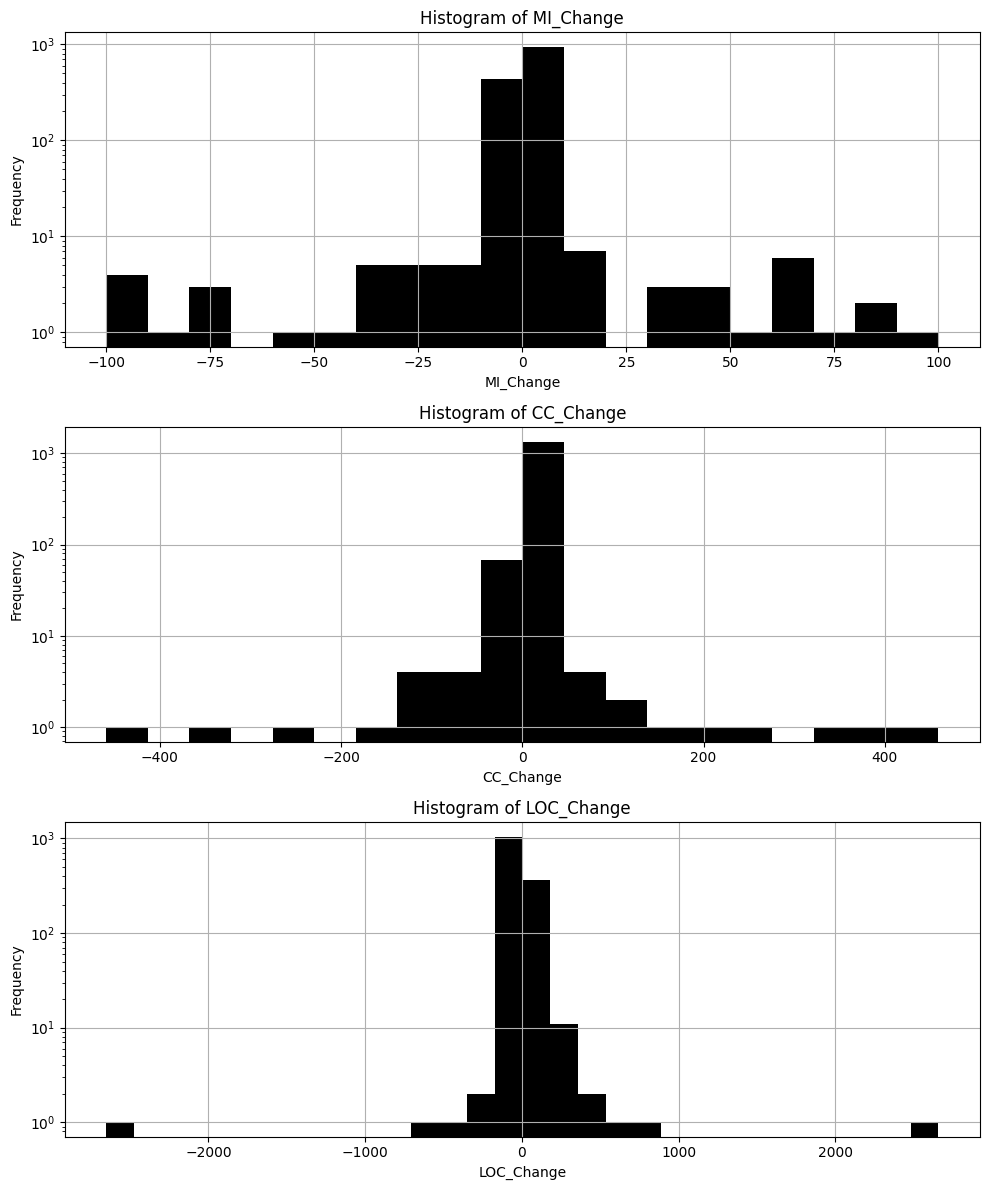

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
data["MI_Change"].hist(ax=axes[0], bins=20, color = 'black', log=True)
axes[0].set_xlabel("MI_Change")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of MI_Change")

data["CC_Change"].hist(ax=axes[1], bins=20, color = 'black', log=True)
axes[1].set_xlabel("CC_Change")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of CC_Change")

data["LOC_Change"].hist(ax=axes[2], bins=30, color = 'black', log=True)
axes[2].set_xlabel("LOC_Change")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Histogram of LOC_Change")

plt.tight_layout()
plt.show()


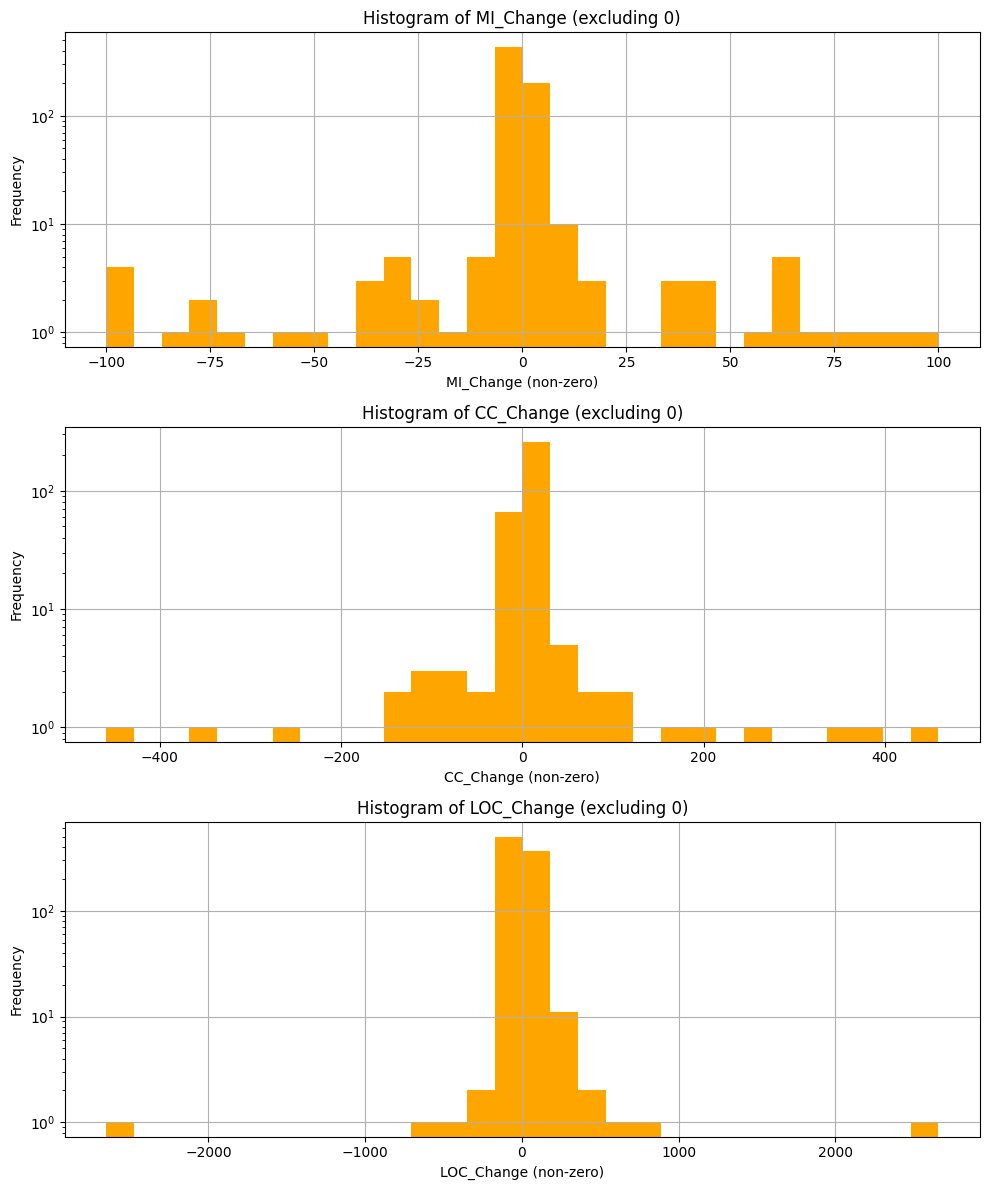

In [ ]:
fig2, axes2 = plt.subplots(3, 1, figsize=(10, 12))

data.loc[data["MI_Change"] != 0, "MI_Change"].hist(ax=axes2[0], bins=30, color = 'orange', log=True)
axes2[0].set_xlabel("MI_Change (non-zero)")
axes2[0].set_ylabel("Frequency")
axes2[0].set_title("Histogram of MI_Change (excluding 0)")

data.loc[data["CC_Change"] != 0, "CC_Change"].hist(ax=axes2[1], bins=30, color = 'orange', log=True)
axes2[1].set_xlabel("CC_Change (non-zero)")
axes2[1].set_ylabel("Frequency")
axes2[1].set_title("Histogram of CC_Change (excluding 0)")

data.loc[data["LOC_Change"] != 0, "LOC_Change"].hist(ax=axes2[2], bins=30, color = 'orange', log=True)
axes2[2].set_xlabel("LOC_Change (non-zero)")
axes2[2].set_ylabel("Frequency")
axes2[2].set_title("Histogram of LOC_Change (excluding 0)")

plt.tight_layout()
plt.show()

In [ ]:
data.to_csv("commits_with_radon_metrics.csv", escapechar='\\')

In [25]:
data = pd.read_csv("commits_with_radon_metrics.csv", escapechar='\\')
data.sample(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Hash,Message,Filename,Source code(before),Source code(after),Diff,LLM Inference,rectified message,MI_Change,CC_Change,LOC_Change
373,373,373,373,a982b3c1acdf200e90057d94d798704a515a4c41,Some bug fixes to ZoomedScene,moving_camera_scene.py,from __future__ import absolute_import\n\nfrom...,from __future__ import absolute_import\n\nfrom...,"@@ -1,19 +1,20 @@\n from __future__ import abs...",add tests for movingcamera,"""Add tests for MovingCameraScene and fix bugs ...",5.887105,1,1
1035,1035,1035,1035,b3b7d214adff2088f6c75cbc814cbbf8f1a9b4e4,Fix Write bug (#1740)\n\n* Avoid division by z...,creation.py,from manimlib.animation.animation import Anima...,from manimlib.animation.animation import Anima...,"@@ -146,7 +146,7 @@ class Write(DrawBorderThen...",update animator.py,Fix Write bug (#1740),-0.231464,0,0
898,898,898,898,1084dfb68136bfeb77cf08e787c12f58fd14028d,Partial fix for Surface.pointwise_become_parti...,surface.py,import numpy as np\nimport moderngl\n\nfrom ma...,import numpy as np\nimport moderngl\n\nfrom ma...,"@@ -101,16 +101,16 @@ class Surface(Mobject):\...",add pointwise_become_partial to surface,"""Add pointwise_become_partial to Surface and S...",0.000000,0,0
717,717,717,717,cf2d8d47e6cf1542622d5fe98494b7bc561bf518,Fixed get_quadratic_approximation_of_cubic to ...,bezier.py,from scipy import linalg\nimport numpy as np\n...,from scipy import linalg\nimport numpy as np\n...,"@@ -2,6 +2,7 @@ from scipy import linalg\n imp...",add support for closed_threshold,"""Fixed get_quadratic_approximation_of_cubic to...",-2.530011,0,39
349,349,349,349,5f73509264a0dda8d94846fe9956be209f9f68b9,fixed imports in new EoP structure,intro.py,from big_ol_pile_of_manim_imports import *\nfr...,from big_ol_pile_of_manim_imports import *\nfr...,"@@ -1,5 +1,5 @@\n from big_ol_pile_of_manim_im...",add missing import,"""Updated OpeningQuote class with new EoP struc...",0.000000,0,0
